In [0]:
from statsmodels.datasets import co2
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df = co2.load_pandas().data

In [3]:
df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [4]:
df.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


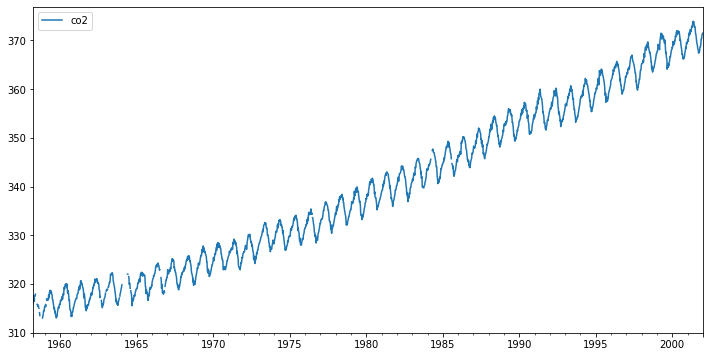

In [5]:
df.plot(figsize=(12, 6))

In [6]:
df.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [7]:
df.dtypes

co2    float64
dtype: object

In [0]:
df.index = pd.to_datetime(df.index)

In [9]:
df['1958-04']

,co2
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [10]:
df.isnull().sum()

co2    59
dtype: int64

In [0]:
df = df.dropna()

In [12]:
acf = sm.tsa.stattools.acf(df, nlags=40)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [13]:
acf

array([1.        , 0.99834844, 0.99667427, 0.99486613, 0.9928028 ,
       0.99053283, 0.98808437, 0.98556195, 0.98296466, 0.98021286,
       0.97740946, 0.97459315, 0.97182281, 0.96908372, 0.96641947,
       0.9638267 , 0.96127404, 0.9588136 , 0.95643753, 0.95418019,
       0.95206044, 0.95009255, 0.94826422, 0.94654889, 0.94494661,
       0.94348667, 0.94213477, 0.94090858, 0.93980787, 0.93886299,
       0.93801405, 0.93732403, 0.93674725, 0.93630505, 0.93598765,
       0.93579013, 0.93575146, 0.93580811, 0.93595699, 0.93619005,
       0.9365025 ])

<BarContainer object of 41 artists>

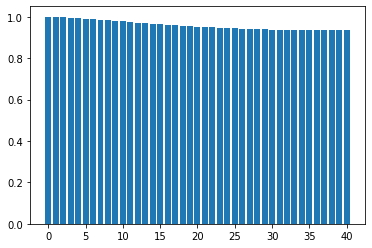

In [14]:
plt.bar(range(len(acf)), acf)

In [0]:
pacf = sm.tsa.stattools.pacf(df, nlags=40, method='ols')

<BarContainer object of 41 artists>

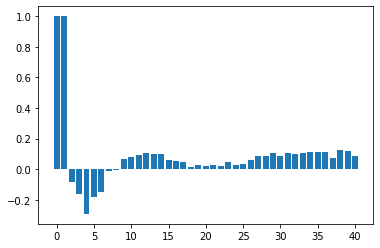

In [16]:
plt.bar(range(len(pacf)), pacf)

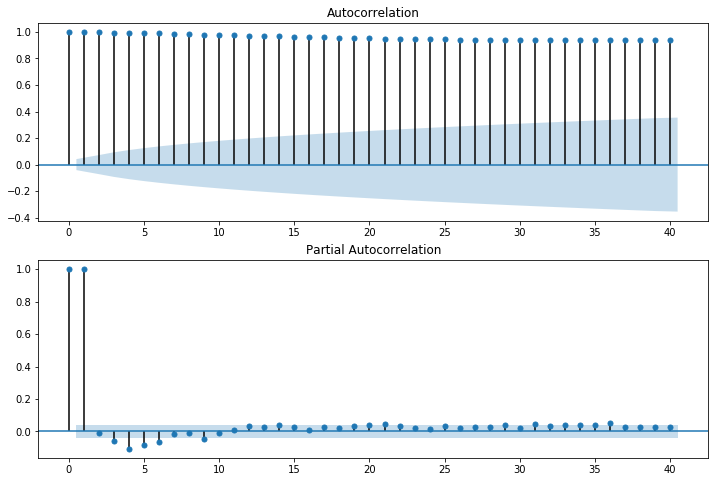

In [17]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [18]:
sm.tsa.arma_order_select_ic(df, ic='aic', trend='nc')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

{'aic':              0             1             2
 0          NaN  29192.069457  26183.286460
 1  3277.693754  18227.978652   3228.723048
 2  3261.817416  30852.397298   3267.221208
 3  3202.078896   3263.657181   3274.579953
 4  3006.778939   2902.063715   3277.558213, 'aic_min_order': (4, 1)}

In [19]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_4_1_1 = ARIMA(df, order=(4, 1, 1)).fit(dist=False)
ARIMA_4_1_1.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const          0.026283
ar.L1.D.co2    0.359850
ar.L2.D.co2    0.104416
ar.L3.D.co2    0.231330
ar.L4.D.co2    0.084674
ma.L1.D.co2   -0.414261
dtype: float64

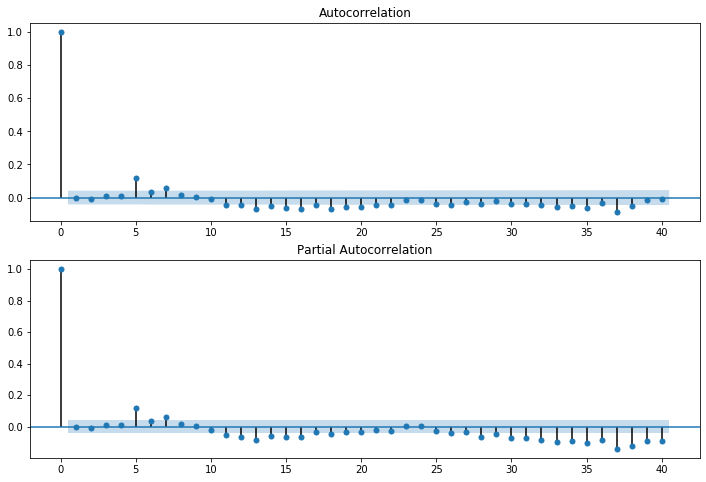

In [20]:
resid = ARIMA_4_1_1.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [21]:
sm.tsa.arma_order_select_ic(df.diff().dropna(), ic='aic', trend='nc')

{'aic':              0            1            2
 0          NaN  3245.369728  3212.200259
 1  3241.364263  3058.853137  2907.253427
 2  3181.843972  2977.161585  2812.941252
 3  2984.279216  2885.424479  2799.649737
 4  2912.559260  2879.075789  2758.565891, 'aic_min_order': (4, 2)}

In [48]:
ARIMA_4_1_2 = ARIMA(df, order=(4, 1, 2)).fit()
SARIMA_4_1_2 = sm.tsa.SARIMAX(df, order=(4, 1, 2), seasonal_order=(1, 1, 1, 50)).fit(method='bfgs', maxiter=3)
ARIMA_4_1_2.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

         Current function value: 0.697568
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const          0.025462
ar.L1.D.co2    1.580125
ar.L2.D.co2   -0.577176
ar.L3.D.co2    0.104015
ar.L4.D.co2   -0.165092
ma.L1.D.co2   -1.688123
ma.L2.D.co2    0.791976
dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1405: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


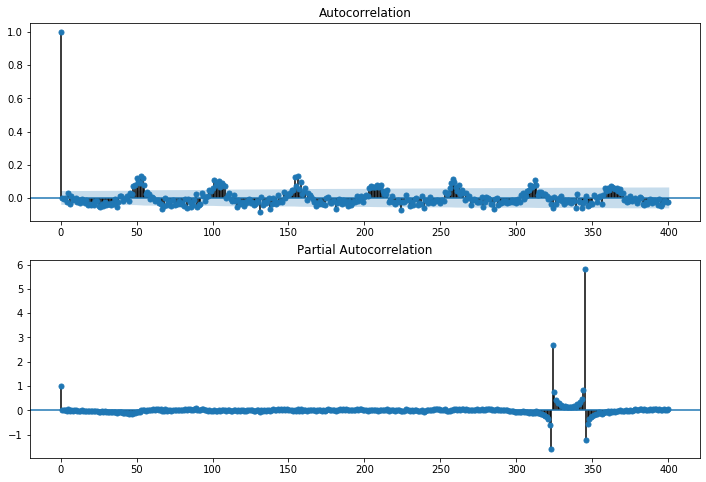

In [45]:
resid = ARIMA_4_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=400, ax=ax2)

In [24]:
len(df)

2225

In [25]:
df.loc['2001-01-06']

co2    369.8
Name: 2001-01-06 00:00:00, dtype: float64

In [57]:
df_pred = SARIMA_4_1_2.predict(start='2001-01-06', end='2009-12-30', dynamic=True)

KeyError: ignored

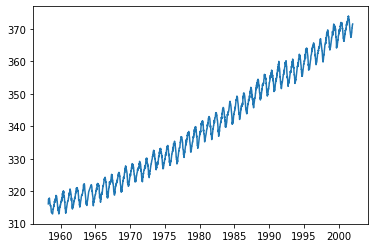

In [92]:
plt.plot(df.index, df['co2'])
# plt.plot(df_pred)

In [0]:
fore = ARIMA_4_1_2.forecast(1000)

In [39]:
fore.index

<function tuple.index>

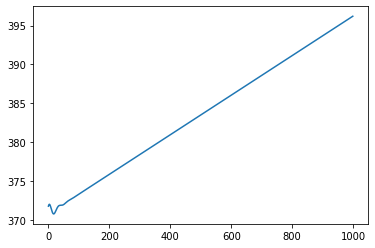

In [40]:
plt.plot(fore[0])

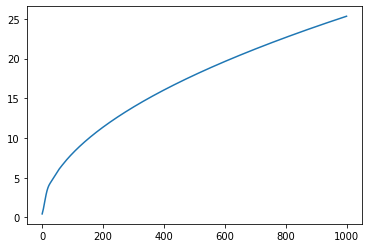

In [41]:
plt.plot(fore[1])

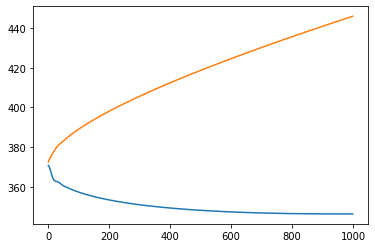

In [42]:
plt.plot(fore[2])